### ANOVA

* We will use a one tail Anova test to analyze the variance between number of violations committed by each restaurant inspected in 2019 and 2020, while they were assigned to a 'Grade' A, B or C.

### Assumptions
* The samples come from a normal distribution.
* The variance is homogeneous.
* Samples are independent.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
%store -r X_train

* ### 2019

In [66]:
filter = X_train['InspectionYear'] == '2019'
df = X_train[filter]

In [67]:
df = df.groupby(["Grade", "Camis", "Dba"]).agg({'ViolationCode':'count'}).sort_values(
    'Grade', ascending=False).reset_index()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21685 entries, 0 to 21684
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Grade          21685 non-null  object
 1   Camis          21685 non-null  object
 2   Dba            21685 non-null  object
 3   ViolationCode  21685 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 677.8+ KB


,Grade,Camis,Dba,ViolationCode
0,P,50099800,MIAO MIAO YA,1
1,P,50002071,DELIS 48,3
2,P,41707407,GLENDALE DINER,1
3,P,41713504,ISIS RESTAURANT,2
4,P,41714821,NEW MUM'S KITCHEN,2


In [68]:
df.Grade.value_counts()

A    17993
B     2245
C      766
P      381
N      300
Name: Grade, dtype: int64

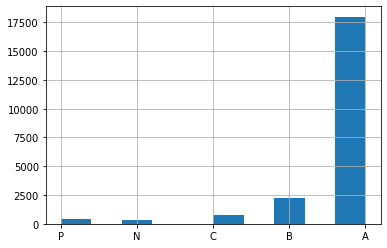

In [69]:
df.Grade.hist()
plt.show()

Let's compare grades  'A', 'B', 'C' only.

In [70]:
df.drop(df.loc[df['Grade']== 'P'].index, inplace=True)
df.drop(df.loc[df['Grade']== 'N'].index, inplace=True)

* ### Define Hypothesis

    * Null Hypothesis 
      * H0: There is no difference in the average number of violations committed by grade group.
    * Alternative Hypothesis 
      * Ha: At least one of the Grade groups has a different average number of violations.

$\alpha$ = 0.05

In [71]:
anova = ols('ViolationCode ~ Grade', data=df).fit()
table = sm.stats.anova_lm(anova, typ=2)
table

,sum_sq,df,F,PR(>F)
Grade,2294.921167,2.0,960.078736,0.0
Residual,25099.836927,21001.0,NaN,NaN


In [72]:
stats.shapiro(anova.resid)

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8491287231445312, pvalue=0.0)

In [73]:
stats.levene(df['ViolationCode'][df['Grade'] == 'A'],
             df['ViolationCode'][df['Grade'] == 'B'],
             df['ViolationCode'][df['Grade'] == 'C'],
             )

LeveneResult(statistic=375.360429385122, pvalue=6.746623089780492e-161)

In [74]:
mc = MultiComparison(df['ViolationCode'], df['Grade'])
results = mc.tukeyhsd()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


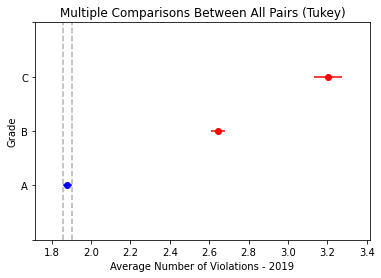

In [75]:
results.plot_simultaneous(comparison_name='A', figsize=(6,4), 
                             ylabel='Grade', xlabel='Average Number of Violations - 2019');

* There's significant statistical difference to reject the Null Hypothesis. 